In [ ]:
#import sys
#!{sys.executable} -m pip install #required package

In [4]:
import io
import requests
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

import matplotlib.pyplot as plt

In [71]:
url="https://raw.githubusercontent.com/Yorko/mlcourse_open/master/data/hour_online.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')), index_col=['Time'], parse_dates=['Time'])

In [70]:
def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

plotly_df(df, title = "Online users")

In [21]:
def moving_average(series, n):
    return np.average(series[-n:])

moving_average(df.Users, 24)

29858.333333333332

In [38]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    rolling_std = series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    plt.plot(series[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

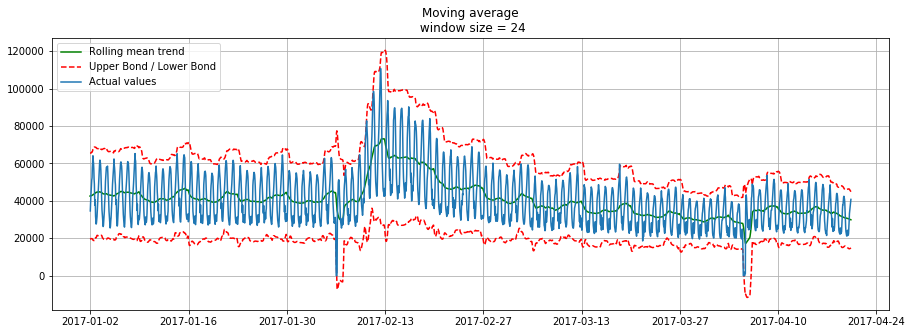

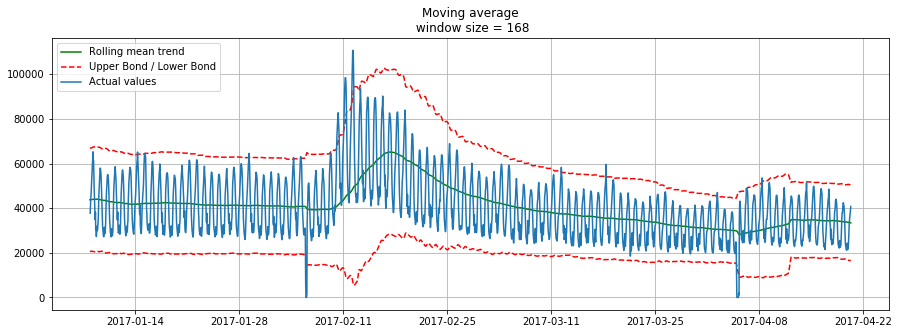

In [39]:
plotMovingAverage(df, 24) # сглаживаем по дням
plotMovingAverage(df, 24*7) # сглаживаем по неделям
plt.show()

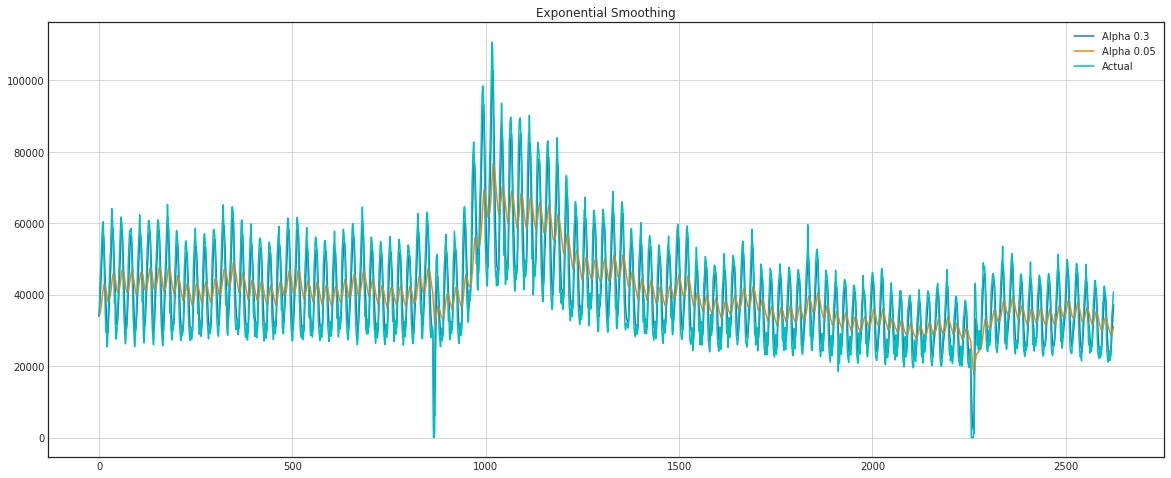

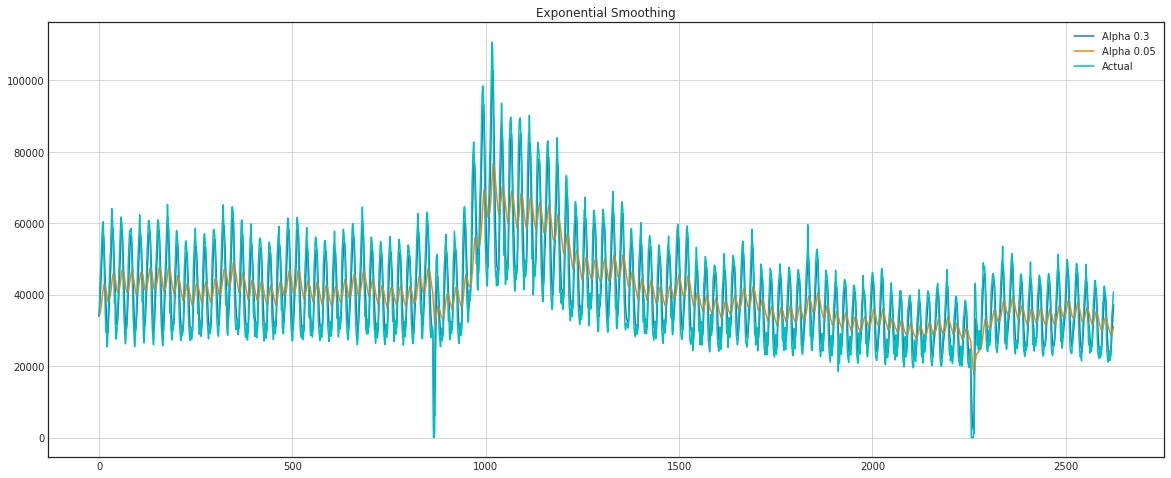

In [47]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05]:
        plt.plot(exponential_smoothing(df.Users, alpha), label="Alpha {}".format(alpha))
    plt.plot(df.Users.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)
plt.show()

In [79]:
df1 = df.copy(deep=True)
df1['Users'] = exponential_smoothing(df1.Users, 0.3)
plotly_df(df1)